## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  66.003809  1321.973542  0.498931   8.107664  662.956550
1  49.172214   743.158824  0.003607  10.280679   49.346071
2  59.533717  1427.706816  0.420608   7.354858  603.412115
3  85.467490   651.365209  0.581132   9.560830  388.087480
4  19.731484   270.601657  0.961734   5.523777  260.951485


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0064516	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9948472	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9830267	total: 58.2ms	remaining: 19.4s
3:	learn: 0.9714197	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9568531	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9466814	total: 59.5ms	remaining: 9.85s
6:	learn: 0.9343864	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9222701	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9109594	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8995293	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8894005	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8760304	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8630057	total: 63.3ms	remaining: 4.8s
13:	learn: 0.8511556	total: 63.7ms	remaining: 4.49s
14:	learn: 0.8393282	total: 64.1ms	remaining: 4.21s
15:	learn: 0.8297687	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8173757	total: 65ms	remaining: 3.76s
17:	learn: 0.8085690	total: 65.4ms	remaining: 3.57s
18:	learn: 0.8009292	total: 65.8ms	remaining: 3.

110:	learn: 0.2720413	total: 106ms	remaining: 849ms
111:	learn: 0.2689894	total: 107ms	remaining: 845ms
112:	learn: 0.2661475	total: 107ms	remaining: 839ms
113:	learn: 0.2637804	total: 107ms	remaining: 834ms
114:	learn: 0.2608037	total: 108ms	remaining: 830ms
115:	learn: 0.2580846	total: 108ms	remaining: 825ms
116:	learn: 0.2555279	total: 109ms	remaining: 821ms
117:	learn: 0.2523679	total: 109ms	remaining: 816ms
118:	learn: 0.2499611	total: 110ms	remaining: 811ms
119:	learn: 0.2479933	total: 110ms	remaining: 806ms
120:	learn: 0.2455952	total: 110ms	remaining: 801ms
121:	learn: 0.2423079	total: 111ms	remaining: 797ms
122:	learn: 0.2408333	total: 111ms	remaining: 792ms
123:	learn: 0.2383961	total: 112ms	remaining: 789ms
124:	learn: 0.2364703	total: 112ms	remaining: 785ms
125:	learn: 0.2336065	total: 113ms	remaining: 781ms
126:	learn: 0.2309632	total: 113ms	remaining: 777ms
127:	learn: 0.2288883	total: 113ms	remaining: 772ms
128:	learn: 0.2265986	total: 114ms	remaining: 768ms
129:	learn: 

303:	learn: 0.0587485	total: 186ms	remaining: 425ms
304:	learn: 0.0584100	total: 186ms	remaining: 424ms
305:	learn: 0.0581397	total: 186ms	remaining: 422ms
306:	learn: 0.0578030	total: 187ms	remaining: 421ms
307:	learn: 0.0574268	total: 187ms	remaining: 420ms
308:	learn: 0.0570821	total: 187ms	remaining: 419ms
309:	learn: 0.0567561	total: 188ms	remaining: 417ms
310:	learn: 0.0564578	total: 188ms	remaining: 417ms
311:	learn: 0.0561750	total: 189ms	remaining: 416ms
312:	learn: 0.0558673	total: 189ms	remaining: 415ms
313:	learn: 0.0555989	total: 189ms	remaining: 414ms
314:	learn: 0.0553494	total: 190ms	remaining: 413ms
315:	learn: 0.0550476	total: 191ms	remaining: 413ms
316:	learn: 0.0548163	total: 191ms	remaining: 412ms
317:	learn: 0.0544910	total: 191ms	remaining: 411ms
318:	learn: 0.0540727	total: 192ms	remaining: 410ms
319:	learn: 0.0538190	total: 192ms	remaining: 409ms
320:	learn: 0.0535761	total: 193ms	remaining: 408ms
321:	learn: 0.0533414	total: 193ms	remaining: 407ms
322:	learn: 

556:	learn: 0.0185907	total: 288ms	remaining: 229ms
557:	learn: 0.0185091	total: 288ms	remaining: 228ms
558:	learn: 0.0184224	total: 289ms	remaining: 228ms
559:	learn: 0.0183433	total: 289ms	remaining: 227ms
560:	learn: 0.0182528	total: 289ms	remaining: 226ms
561:	learn: 0.0181737	total: 290ms	remaining: 226ms
562:	learn: 0.0180740	total: 290ms	remaining: 225ms
563:	learn: 0.0180227	total: 291ms	remaining: 225ms
564:	learn: 0.0179471	total: 291ms	remaining: 224ms
565:	learn: 0.0178970	total: 291ms	remaining: 223ms
566:	learn: 0.0178213	total: 292ms	remaining: 223ms
567:	learn: 0.0177252	total: 292ms	remaining: 222ms
568:	learn: 0.0176765	total: 292ms	remaining: 222ms
569:	learn: 0.0175853	total: 293ms	remaining: 221ms
570:	learn: 0.0174927	total: 293ms	remaining: 220ms
571:	learn: 0.0174303	total: 293ms	remaining: 220ms
572:	learn: 0.0173404	total: 294ms	remaining: 219ms
573:	learn: 0.0172538	total: 294ms	remaining: 218ms
574:	learn: 0.0171691	total: 295ms	remaining: 218ms
575:	learn: 

740:	learn: 0.0106051	total: 366ms	remaining: 128ms
741:	learn: 0.0105415	total: 367ms	remaining: 128ms
742:	learn: 0.0105064	total: 367ms	remaining: 127ms
743:	learn: 0.0104982	total: 368ms	remaining: 127ms
744:	learn: 0.0104636	total: 368ms	remaining: 126ms
745:	learn: 0.0104165	total: 369ms	remaining: 126ms
746:	learn: 0.0103826	total: 369ms	remaining: 125ms
747:	learn: 0.0103371	total: 369ms	remaining: 124ms
748:	learn: 0.0103040	total: 370ms	remaining: 124ms
749:	learn: 0.0102730	total: 370ms	remaining: 123ms
750:	learn: 0.0102406	total: 371ms	remaining: 123ms
751:	learn: 0.0101757	total: 371ms	remaining: 122ms
752:	learn: 0.0101439	total: 371ms	remaining: 122ms
753:	learn: 0.0101141	total: 372ms	remaining: 121ms
754:	learn: 0.0100830	total: 372ms	remaining: 121ms
755:	learn: 0.0100645	total: 372ms	remaining: 120ms
756:	learn: 0.0100339	total: 373ms	remaining: 120ms
757:	learn: 0.0100159	total: 373ms	remaining: 119ms
758:	learn: 0.0099656	total: 374ms	remaining: 119ms
759:	learn: 

981:	learn: 0.0046453	total: 468ms	remaining: 8.59ms
982:	learn: 0.0046188	total: 469ms	remaining: 8.11ms
983:	learn: 0.0046144	total: 469ms	remaining: 7.63ms
984:	learn: 0.0045904	total: 470ms	remaining: 7.16ms
985:	learn: 0.0045861	total: 470ms	remaining: 6.68ms
986:	learn: 0.0045642	total: 471ms	remaining: 6.2ms
987:	learn: 0.0045414	total: 471ms	remaining: 5.72ms
988:	learn: 0.0045372	total: 472ms	remaining: 5.25ms
989:	learn: 0.0045254	total: 472ms	remaining: 4.77ms
990:	learn: 0.0045051	total: 473ms	remaining: 4.29ms
991:	learn: 0.0045009	total: 473ms	remaining: 3.81ms
992:	learn: 0.0044893	total: 473ms	remaining: 3.34ms
993:	learn: 0.0044852	total: 474ms	remaining: 2.86ms
994:	learn: 0.0044599	total: 474ms	remaining: 2.38ms
995:	learn: 0.0044393	total: 475ms	remaining: 1.91ms
996:	learn: 0.0044353	total: 475ms	remaining: 1.43ms
997:	learn: 0.0044109	total: 475ms	remaining: 952us
998:	learn: 0.0043895	total: 476ms	remaining: 476us
999:	learn: 0.0043677	total: 476ms	remaining: 0us

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

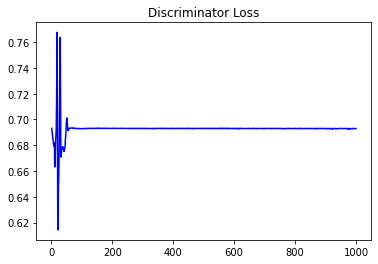

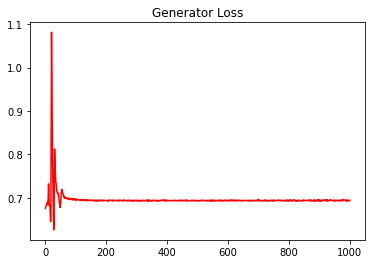

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006335448343617477


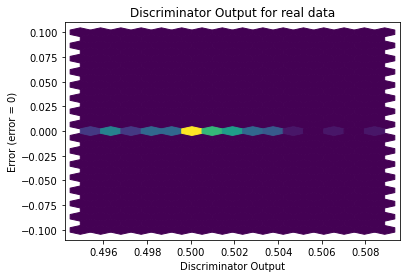

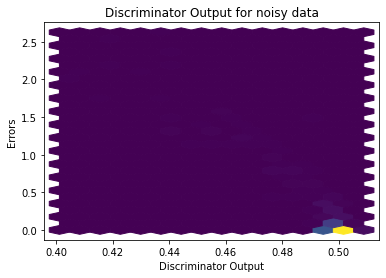

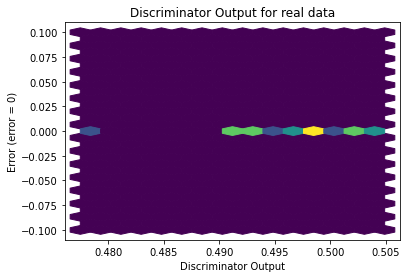

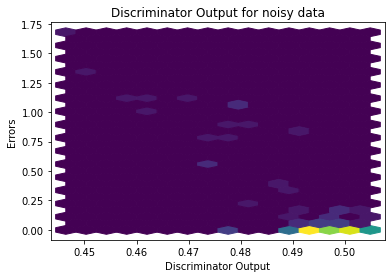

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


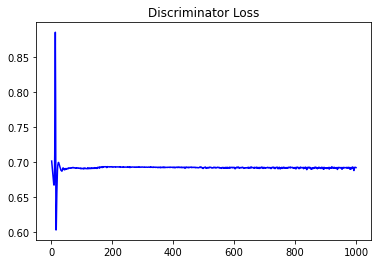

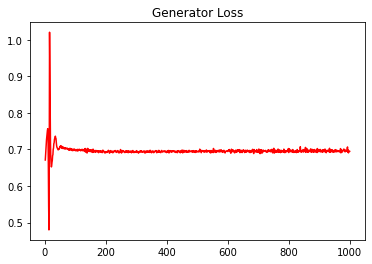

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003844385381290992


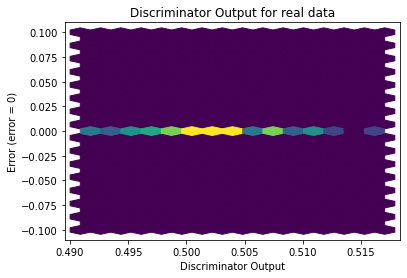

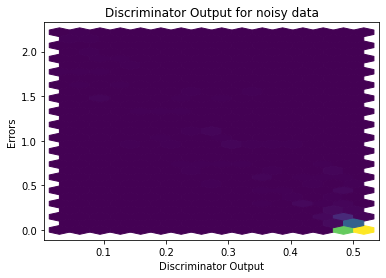

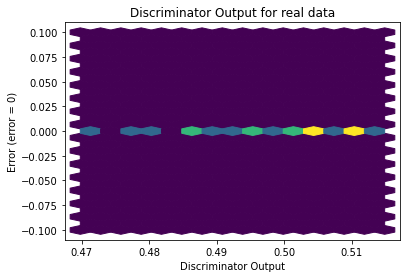

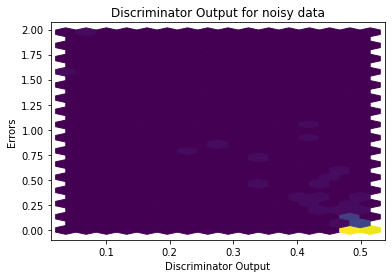

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2281]], requires_grad=True)
